<a href="https://colab.research.google.com/github/olowu289/Deep-learning-machine-learning-project/blob/main/Project_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/stke9/SliceGAN.git

Cloning into 'SliceGAN'...
remote: Enumerating objects: 312, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 312 (delta 0), reused 4 (delta 0), pack-reused 303
Receiving objects: 100% (312/312), 51.15 MiB | 23.24 MiB/s, done.
Resolving deltas: 100% (151/151), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Important information


After cloning the sliceGAN repository, change the following detaits in the run_slicegan.py


Project_name: 64MODEL
Project_dir: Traindata_gen
Image_type: grayscale
img_channel: 1
data_type: grayscale
data_path:



In [ ]:
!git clone https://github.com/stke9/SliceGAN.git

Cloning into 'SliceGAN'...
remote: Enumerating objects: 312, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 312 (delta 0), reused 4 (delta 0), pack-reused 303
Receiving objects: 100% (312/312), 51.15 MiB | 1.51 MiB/s, done.
Resolving deltas: 100% (151/151), done.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img=plt.imread("/content/drive/MyDrive/work/images/SUS_XZ.png")


(725, 725)


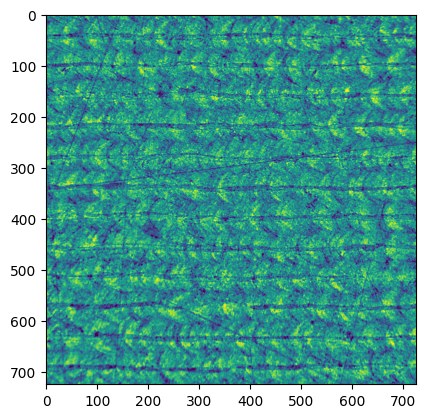

In [6]:
print(img.shape)
plt.imshow(img)

In [ ]:
!python /content/SliceGAN/run_slicegan.py 1

In [ ]:
!python /content/SliceGAN/run_slicegan.py 1

Loading Dataset...
cuda:0  will be used.

Starting Training Loop...
[0/100][25/3600]	ETA: 222 hrs 25 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][50/3600]	ETA: 145 hrs 22 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][75/3600]	ETA: 118 hrs 4 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][100/3600]	ETA: 104 hrs 28 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][125/3600]	ETA: 96 hrs 24 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][150/3600]	ETA: 91 hrs 3 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][175/3600]	ETA: 87 hrs 25 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][200/3600]	ETA: 84 hrs 46 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][225/3600]	ETA: 82 hrs 23 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][250/3600]	ETA: 80 hrs 31 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][275/3600]	ETA: 78 hrs 59 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][300/3600]	ETA: 77 hrs 40 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][325/3600]	ETA: 76 hrs 39 mins
torch.Size([1, 1, 64, 64, 64])
[0/100][350/3600]	ETA: 75 hrs 52 min

In [ ]:
!python /content/SliceGAN/run_slicegan.py 0

Traceback (most recent call last):
  File "/content/SliceGAN/run_slicegan.py", line 52, in <module>
    netD, netG = networks.slicegan_nets(Project_path, Training, image_type, dk, ds, df,dp, gk ,gs, gf, gp)
  File "/content/SliceGAN/slicegan/networks.py", line 21, in slicegan_nets
    with open(pth + '_params.data', 'rb') as filehandle:
FileNotFoundError: [Errno 2] No such file or directory: '/content/Traindatagen_4/64model/64model_params.data'


In [ ]:
### Welcome to SliceGAN ###
####### Steve Kench #######
'''
Use this file to define your settings for a training run, or
to generate a synthetic image using a trained generator.
'''

# git clone https://github.com/stke9/SliceGAN.git

from slicegan import model, networks, util
import argparse
# Define project name
Project_name = '64model'
# Specify project folder.
Project_dir = 'Trained_Generators/SUS'
# Run with False to show an image during or after training
parser = argparse.ArgumentParser()
parser.add_argument('training', type=int)
args = parser.parse_args()
Training = args.training
# Training = 0

Project_path = util.mkdr(Project_name, Project_dir, Training)

## Data Processing
# Define image  type (colour, grayscale, three-phase or two-phase.
# n-phase materials must be segmented)
image_type = 'grayscale'
# img_channels should be number of phases for nphase, 3 for colour, or 1 for grayscale
img_channels = 1
# define data type (for colour/grayscale images, must be 'colour' / '
# greyscale. nphase can be, 'tif2D', 'png', 'jpg', tif3D, 'array')
data_type = 'grayscale'
# Path to your data. One string for isotrpic, 3 for anisotropic
data_path = ['Examples/SUS_XZ.png', 'Examples/SUS_XY.png', 'Examples/SUS_YZ90R.png']

## Network Architectures
# Training image size, no. channels and scale factor vs raw data
img_size, scale_factor = 64,  1
# z vector depth
z_channels = 64
# Layers in G and D
lays = 6
laysd = 6
dk, gk = [4]*laysd, [4]*lays                                    # kernal sizes
# gk[0]=8
ds, gs = [2]*laysd, [2]*lays                                    # strides
# gs[0] = 4
df, gf = [img_channels, 64, 128, 256, 512, 1], [z_channels, 512, 256, 128, 64, img_channels]  # filter sizes for hidden layers

dp, gp = [1, 1, 1, 1, 0], [2, 2, 2, 2, 3]

## Create Networks
netD, netG = networks.slicegan_nets(Project_path, Training, image_type, dk, ds, df,dp, gk ,gs, gf, gp)

# Train
if Training:
    model.train(Project_path, image_type, data_type, data_path, netD, netG, img_channels, img_size, z_channels, scale_factor)
else:
    img, raw, netG = util.test_img(Project_path, image_type, netG(), z_channels, lf=18, periodic=[0, 0, 0])